In [ ]:
from google.colab import files

uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df = df1[df1.TotalCharges!=' ']
df.shape

(7032, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#PREPROCESSING


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.TotalCharges.dtype

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.],
        [ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

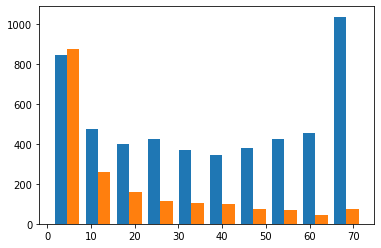

In [ ]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes])

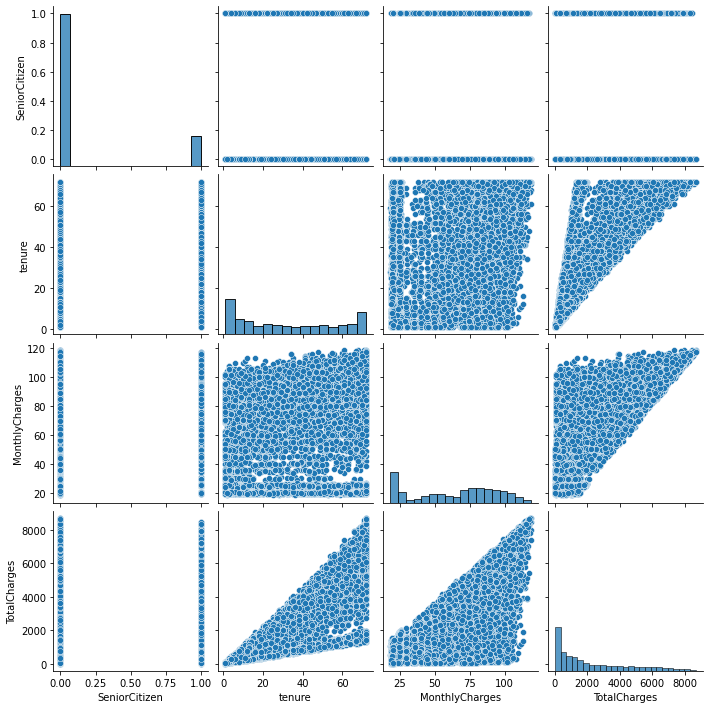

In [ ]:
sns.pairplot(df)

In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
def uniqueCV(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [ ]:
uniqueCV(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity',
                 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No' : 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df['gender'].unique()

array([1, 0])

In [ ]:
df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2 = df2.drop('customerID', axis=1)

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

#SMOTE

Counter({0: 5163, 1: 1869})


<BarContainer object of 2 artists>

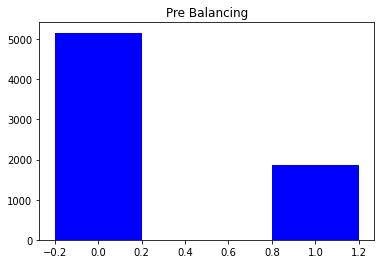

In [ ]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)
courses = list(counter.keys())
values = list(counter.values())
plt.title('Pre Balancing')
plt.bar(courses, values, color ='blue',
        width = 0.4)


Counter({0: 5163, 1: 5163})


<BarContainer object of 2 artists>

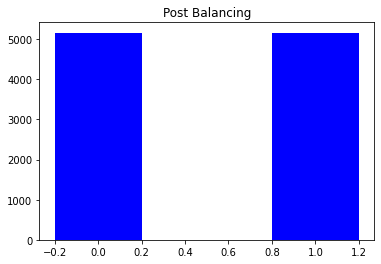

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
courses = list(counter.keys())
values = list(counter.values())
plt.title('Post Balancing')
plt.bar(courses, values, color ='blue',
        width = 0.4)

In [ ]:
yes_no_columns = ['Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No' : 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
y_test.shape

(2066,)

#**CNN**

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout, Conv1D
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Conv1D(26,2,input_shape=(26,1)))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(0.25))
        else:
            model.add(Conv1D(26,1))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(0.25))

    model.add(Flatten())   
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['relu','sigmoid','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [32,64], epochs=[30,60])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


[0.8002421379089355,
 {'activation': 'relu', 'batch_size': 64, 'epochs': 60, 'layers': [20]}]

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout, Conv1D
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Conv1D(20,2,input_shape=(26,1),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Conv1D(20,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(7, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 25, 20)            60        
                                                                 
 batch_normalization_5 (Batc  (None, 25, 20)           80        
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 25, 20)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 24, 20)            820       
                                                                 
 batch_normalization_6 (Batc  (None, 24, 20)           80        
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 24, 20)           

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=60)

Epoch 1/60
259/259 [==============================] - 2s 9ms/step - loss: 0.4363 - accuracy: 0.7999 - val_loss: 0.4608 - val_accuracy: 0.7953
Epoch 2/60
259/259 [==============================] - 3s 10ms/step - loss: 0.4322 - accuracy: 0.8011 - val_loss: 0.4530 - val_accuracy: 0.7914
Epoch 3/60
259/259 [==============================] - 2s 9ms/step - loss: 0.4372 - accuracy: 0.8002 - val_loss: 0.4522 - val_accuracy: 0.7894
Epoch 4/60
259/259 [==============================] - 2s 9ms/step - loss: 0.4338 - accuracy: 0.8024 - val_loss: 0.4511 - val_accuracy: 0.7919
Epoch 5/60
259/259 [==============================] - 2s 10ms/step - loss: 0.4326 - accuracy: 0.7992 - val_loss: 0.4565 - val_accuracy: 0.7827
Epoch 6/60
259/259 [==============================] - 2s 8ms/step - loss: 0.4338 - accuracy: 0.7961 - val_loss: 0.4481 - val_accuracy: 0.7909
Epoch 7/60
259/259 [==============================] - 2s 7ms/step - loss: 0.4320 - accuracy: 0.8000 - val_loss: 0.4598 - val_accuracy: 0.7846
Epoc

In [ ]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1025
           1       0.78      0.82      0.80      1041

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



Text(42.0, 0.5, 'Y')

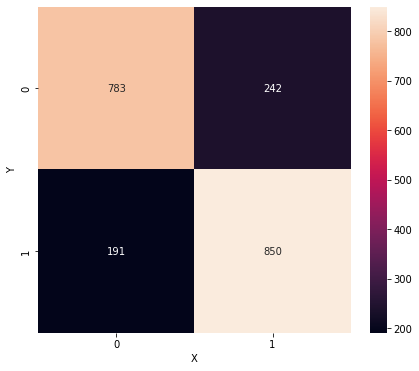

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('Y')

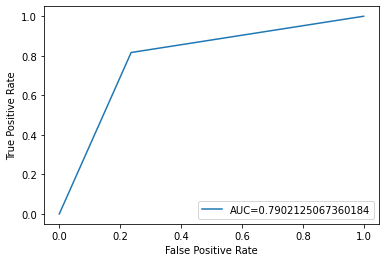

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# **ANN**

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Activation('sigmoid'))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Activation('sigmoid'))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)



layers = [[20], [40, 20], [45, 30, 15]]
activations = ['relu','sigmoid','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [32,64], epochs=[30,60])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(45,input_shape=(26,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 60)

Epoch 1/60
259/259 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.7607 - val_loss: 0.4877 - val_accuracy: 0.7783
Epoch 2/60
259/259 [==============================] - 1s 2ms/step - loss: 0.4611 - accuracy: 0.7804 - val_loss: 0.4758 - val_accuracy: 0.7735
Epoch 3/60
259/259 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.7833 - val_loss: 0.4761 - val_accuracy: 0.7793
Epoch 4/60
259/259 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.7857 - val_loss: 0.4689 - val_accuracy: 0.7778
Epoch 5/60
259/259 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7918 - val_loss: 0.4680 - val_accuracy: 0.7812
Epoch 6/60
259/259 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.7904 - val_loss: 0.4733 - val_accuracy: 0.7798
Epoch 7/60
259/259 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.8002 - val_loss: 0.4739 - val_accuracy: 0.7720
Epoch 

In [ ]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7754


[0.46922391653060913, 0.7754114270210266]

In [ ]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1025
           1       0.74      0.89      0.81      1041

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.78      2066
weighted avg       0.80      0.79      0.78      2066



Text(42.0, 0.5, 'Y')

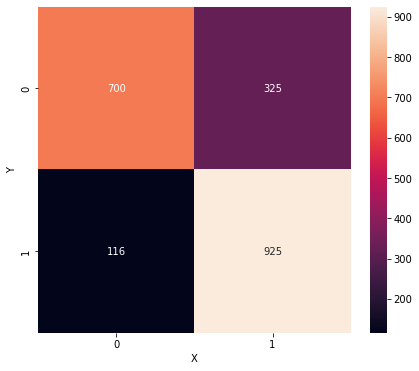

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('Y')

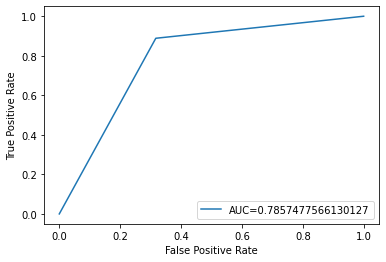

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# **RNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(LSTM(units=10,return_sequences=True,input_shape=[26,1]))
            model.add(LSTM(units=10,return_sequences=True, activation=activation))
            model.add(Activation(activation))
        else:
            model.add(LSTM(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)



layers = [[20], [40, 20], [45, 30, 15]]
activations = ['relu','sigmoid','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [32,64], epochs=[30,60])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
 
grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



In [ ]:
model  = keras.models.Sequential([
                                  keras.layers.LSTM(units=10,return_sequences=True,input_shape=[26,1]),
                                  keras.layers.LSTM(units=10,return_sequences=True, activation='relu'),
                                  keras.layers.TimeDistributed(keras.layers.Dense(1, activation='relu')),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 26, 10)            480       
                                                                 
 lstm_11 (LSTM)              (None, 26, 10)            840       
                                                                 
 time_distributed_5 (TimeDis  (None, 26, 1)            11        
 tributed)                                                       
                                                                 
 flatten_2 (Flatten)         (None, 26)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 27        
                                                                 
Total params: 1,358
Trainable params: 1,358
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs = 15)

Epoch 1/15
130/130 [==============================] - 10s 26ms/step - loss: 0.6856 - accuracy: 0.5179 - val_loss: 0.6721 - val_accuracy: 0.6007
Epoch 2/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5953 - accuracy: 0.6850 - val_loss: 0.5577 - val_accuracy: 0.7309
Epoch 3/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5257 - accuracy: 0.7401 - val_loss: 0.5366 - val_accuracy: 0.7435
Epoch 4/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5211 - accuracy: 0.7460 - val_loss: 0.5195 - val_accuracy: 0.7478
Epoch 5/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5112 - accuracy: 0.7450 - val_loss: 0.5155 - val_accuracy: 0.7415
Epoch 6/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5101 - accuracy: 0.7481 - val_loss: 0.5176 - val_accuracy: 0.7406
Epoch 7/15
130/130 [==============================] - 3s 21ms/step - loss: 0.5091 - accuracy: 0.7454 - val_loss: 0.5160 - val_accuracy: 0.750

In [ ]:
yp = model.predict(X_test)
yp
y_pred = []
for element in yp:
  if (element > 0.5).any():
     y_pred.append(1)
  else:
     y_pred.append(0)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1025
           1       0.73      0.82      0.77      1041

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



Text(42.0, 0.5, 'Y')

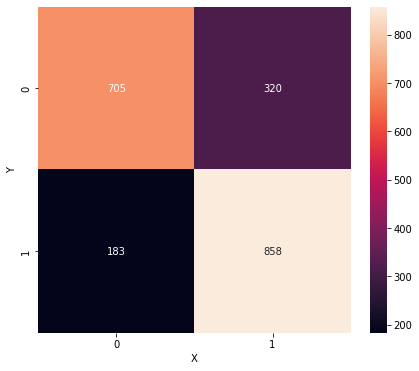

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
import seaborn as sns
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('Y')

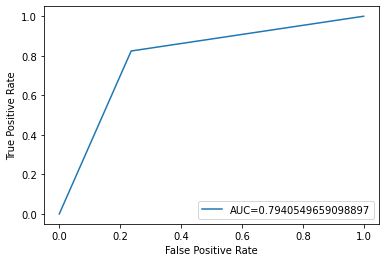

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()